In [1]:
import ipython_import
import stack
import JDFS

importing Jupyter notebook from stack.ipynb
importing Jupyter notebook from JDFS.ipynb


In [5]:
import numpy as np
import pandas as pd

In [12]:
# 加载数据（训练集测试集已分割好）
train_data = pd.read_csv('/home/luguangcheng/UAVnew/train_data_1221.csv',header=0) #全部数据中的训练部分
test_data = pd.read_csv('/home/luguangcheng/UAVnew/test_data_1221.csv',header=0) #全部数据中的测试部分
X_train = train_data.drop('label',axis=1)
y_train = train_data['label']
X_test = test_data.drop('label',axis=1)
y_test = test_data['label']
print X_train.shape,y_train.shape,X_test.shape,y_test.shape

(9000, 90) (9000,) (1400, 90) (1400,)


In [ ]:
# 加载数据（随机分割）
from sklearn.model_selection import train_test_split
raw_data = pd.read_csv('/home/luguangcheng/UAVnew/train_data_1221.csv',header=0)
X = raw_data.drop('label',axis=1)
y = raw_data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [ ]:
# 特征选择与模型训练
sorted_feature = JDFS.feature_sort(X_train,y_train) #对特征进行排序
#sorted_feature_copy = list(sorted_feature)
feature,score,clf = JDFS.feature_selection(X_train,y_train,sorted_feature)

In [ ]:
# 预测
clf.predict(X_test[feature])

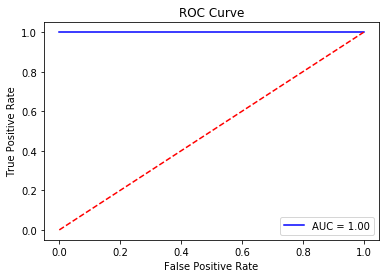

In [4]:
# 画ROC曲线
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

actual = [1,1,1,0,0,0]   #实际值
predictions = [0.9,0.9,0.9,0.1,0.1,0.1]   #预测概率
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)  #根据不同阈值得到的虚警率与召回率
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate, 'b',label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')  #基准线
#plt.xlim([-0.1,1.2])
#plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [7]:
np.where(np.diff(predictions))

(array([2]),)